In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from SimpleRegressions import *

In [2]:
df = pd.read_pickle('new_withCNN.pkl')

In [3]:
df = df.sample(frac=1)
df_train,df_test = np.array_split(df,2)

simpleFeatures = ['jet_pt_ak7','jet_eta_ak7']

factorNames = ['jet_pt_ak7','jet_eta_ak7',
                 'jet_photon_frac_ak7',
                 'jet_electron_frac_ak7',
                 'jet_muon_frac_ak7',
                 'jet_neutHad_frac_ak7',
                 'jet_charHad_frac_ak7',
                 'jet_electron_mult_ak7',
                 'jet_muon_mult_ak7',
                 'jet_photon_mult_ak7',
                 'jet_neutHad_mult_ak7',
                 'jet_charHad_mult_ak7'
                ]

allFactors = ['jet_pt_ak7','jet_eta_ak7',
                 'jet_photon_frac_ak7',
                 'jet_electron_frac_ak7',
                 'jet_muon_frac_ak7',
                 'jet_neutHad_frac_ak7',
                 'jet_charHad_frac_ak7',
                 'jet_electron_mult_ak7',
                 'jet_muon_mult_ak7',
                 'jet_photon_mult_ak7',
                 'jet_neutHad_mult_ak7',
                 'jet_charHad_mult_ak7'
                ]

normalFactors = ['jet_eta_ak7',
                 'jet_photon_frac_ak7',
                 'jet_electron_frac_ak7',
                 'jet_muon_frac_ak7',
                 'jet_neutHad_frac_ak7',
                 'jet_charHad_frac_ak7',
                 'jet_electron_mult_ak7',
                 'jet_muon_mult_ak7',
                 'jet_photon_mult_ak7',
                 'jet_neutHad_mult_ak7',
                 'jet_charHad_mult_ak7'
                ]

scaleData = False
if( scaleData ):
    means = df_perjet.mean()
    rmss = df_perjet.std()

    for f in normalFactors:
        df_perjet[f] = map(lambda x : (x-means[f])/rmss[f],df_perjet[f])

rfr = random_forest_regression(factors=factorNames,regressor='jet_jes_ak7')
rfr.max_depth=20
rfr.fit(df_train,verbose=True,append="_rfall")
rfr.test(df_test,verbose=True,append="_rfall")

rfr_pteta = random_forest_regression(factors=simpleFeatures,regressor='jet_jes_ak7')
rfr_pteta.max_depth=20
rfr_pteta.fit(df_train,verbose=True,append="_rfpteta")
rfr_pteta.test(df_test,verbose=True,append="_rfpteta")

model = rfr.model

train:
RMSE: 0.00894601077016
test:
RMSE: 0.0217494815684
train:
RMSE: 0.0178119740706
test:
RMSE: 0.0332571366719


In [4]:
print df_test.columns
df_test['pred'].head()

Index([u'event', u'run', u'lumi', u'ak7pfcand_ijet', u'ak7pfcand_eta',
       u'ak7pfcand_phi', u'ak7pfcand_pt', u'ak7pfcand_charge', u'ak7pfcand_id',
       u'met', u'sumet', u'rho', u'pthat', u'mcweight', u'njet_ak7',
       u'jet_pt_ak7', u'jet_eta_ak7', u'jet_phi_ak7', u'jet_E_ak7',
       u'jet_msd_ak7', u'jet_area_ak7', u'jet_jes_ak7', u'jet_tau21_ak7',
       u'jet_isW_ak7', u'jet_ncand_ak7', u'pfcand_centered_phi',
       u'pfcand_centered_eta', u'pfcand_riz', u'pfcand_riy', u'jet_image',
       u'jet_eta_ak7_scaled', u'jet_pt_ak7_exp', u'jet_pt_ak7_scaled', u'pred',
       u'residual', u'jet_photon_frac_ak7', u'photon_filter',
       u'electron_filter', u'muon_filter', u'charHad_filter',
       u'neutHad_filter', u'jet_electron_frac_ak7', u'jet_muon_frac_ak7',
       u'jet_charHad_frac_ak7', u'jet_neutHad_frac_ak7',
       u'jet_photon_mult_ak7', u'jet_electron_mult_ak7', u'jet_muon_mult_ak7',
       u'jet_charHad_mult_ak7', u'jet_neutHad_mult_ak7', u'prediction_rfall',
      

9510     1.003263
53115    1.012832
29748    0.997269
49128    0.993386
2574     1.031535
Name: pred, dtype: float32

In [ ]:
# def generate_scan(xlow,xhigh,n=100,projectionVar='jet_pt_ak7'):
#     scanData = []
#     for f in factorNames:
#         if f == projectionVar : 
#             a = range(0,n+1)
#             a = map(lambda x : xlow+x*(xhigh-xlow)/float(n+1),a)
#             scanData.append(a)
#         else :
#             scanData.append([np.mean(df_perjet[f])]*(n+1))
#     return np.array(scanData).transpose()

# for i,f in enumerate(factorNames):
#     #plt.subplot(3,4,i+1)
#     scanX = generate_scan(min(df[f]),max(df[f]),100,f)
#     #print len(scanX.transpose()[i])
#     scanY = model.predict(scanX)
#     #print len(scanY)
#     plt.scatter(df_test[f],df_test['jet_jes_ak7'],s=1)
#     plt.scatter(scanX.transpose()[i],scanY,s=3,color='r')
#     plt.xlabel(f)
#     plt.ylabel("JES")
#     plt.xlim(min(df_test[f]),max(df_test[f])*1.2)
#     plt.show()
#     fig = plt.figure()
#     fig.savefig(f+"_JES.png")

In [22]:
def residual_profile(indep_var,dep_var,c,low_bin,high_bin,nbins):
    print "plot_var:",indep_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df_test[indep_var+'_bins'] = pd.cut(df_test[indep_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    means = df_test.groupby([indep_var+'_bins']).mean()[dep_var].values
    counts = df_test.groupby([indep_var+'_bins']).count()[dep_var].values
    sqrt_counts = map(sqrt,counts)
    errs  = df_test.groupby([indep_var+'_bins']).std()[dep_var].values
    errs = errs/sqrt_counts
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color=c)
    plt.xlabel(indep_var)
    plt.ylabel("<residual>")
    plt.ylim(-0.05,0.05)

plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90
plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90
plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90


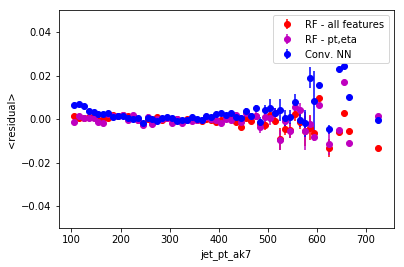

plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60
plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60
plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60


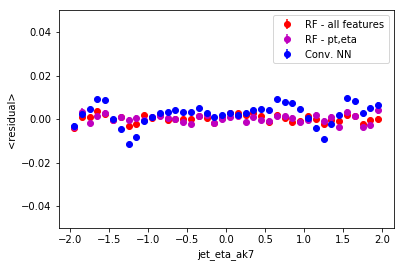

plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


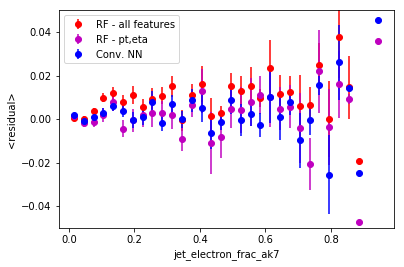

plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


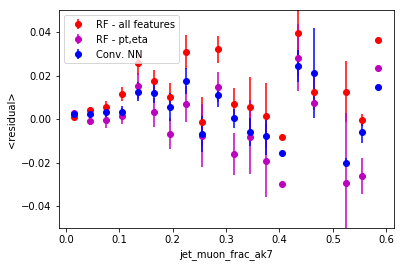

plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


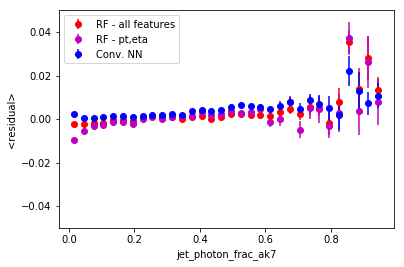

plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


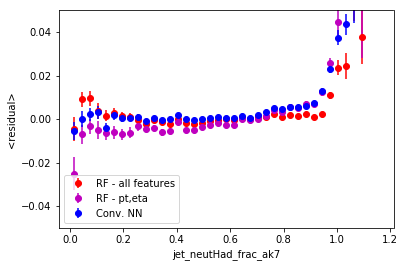

plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


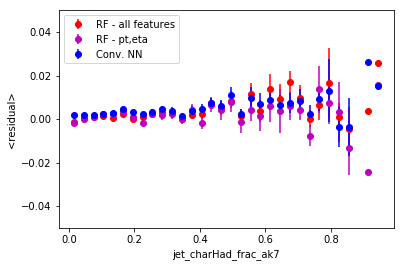

plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


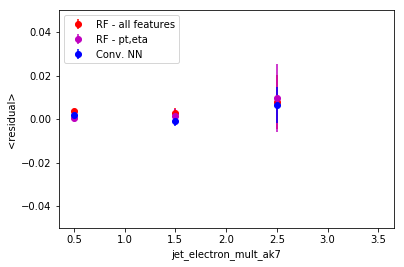

plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


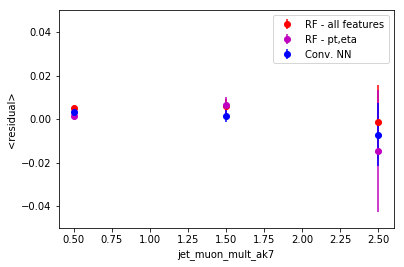

plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


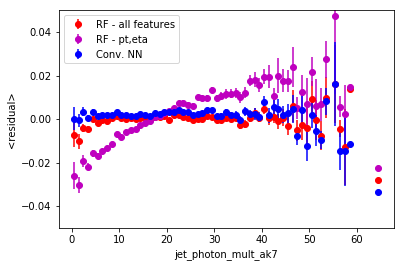

plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


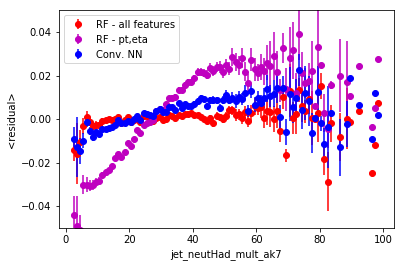

plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


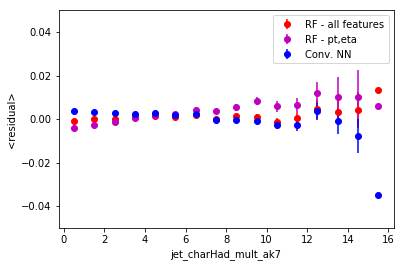

In [26]:
plot_vars=['jet_pt_ak7','jet_eta_ak7','jet_electron_frac_ak7','jet_muon_frac_ak7','jet_photon_frac_ak7','jet_neutHad_frac_ak7','jet_charHad_frac_ak7','jet_electron_mult_ak7','jet_muon_mult_ak7','jet_photon_mult_ak7','jet_neutHad_mult_ak7','jet_charHad_mult_ak7']
var_binning = [(100,1000,90),(-3,3,60),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,100,100),(0,100,100),(0,100,100),(0,100,100),(0,100,100)]
for v,b in zip(plot_vars,var_binning) :
    residual_profile(v,'residual_rfall','r',*b)
    residual_profile(v,'residual_rfpteta','m',*b)
    residual_profile(v,'residual','b',*b)
    plt.legend(['RF - all features','RF - pt,eta','Conv. NN'])
    plt.show()